In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

## Sentiment Analysis 

In [2]:
sentiment_df = pd.read_pickle("amazon_hackon/datasetFinal.pkl")

In [3]:
print(sentiment_df["category"].shape)

print("Value counts for each category")
sentiment_df["category"].value_counts() 
sentiment_df["category"].unique() 


(2025,)
Value counts for each category


array(['Cell_Phones_and_Accessories', 'Magazine_Subscriptions',
       'Appliances', 'All_Beauty', 'AMAZON_FASHION'], dtype=object)

## Stats

In [4]:
stats_df = pd.read_pickle("./Stats_Final_DF.pkl")
print(stats_df.shape)

(5, 11)


## temporal

In [5]:
temporal_df = pd.read_pickle("./Temporal_Final_DF.pkl")
print(temporal_df.shape, temporal_df["category"].value_counts())

(2025, 22) category
Cell_Phones_and_Accessories    1000
Appliances                      828
All_Beauty                       98
AMAZON_FASHION                   98
Magazine_Subscriptions            1
Name: count, dtype: int64


In [6]:
merge_keys = ['overall', 'verified', 'reviewText', 'category', 'reviewTime', 'reviewerID', 'asin', 'reviewerName', 'summary', 'unixReviewTime']

# Remove duplicates from both DataFrames
temporal_clean = temporal_df.drop_duplicates(subset=merge_keys)
sentiment_clean = sentiment_df.drop_duplicates(subset=merge_keys)

# Verify duplicates removed
print(f"temporal_clean: {temporal_clean.shape[0]} rows")
print(f"sentiment_clean: {sentiment_clean.shape[0]} rows")

# Merge cleaned DataFrames
merged_df = pd.merge(
    temporal_clean,
    sentiment_clean,
    on=merge_keys,
    how='inner',
    suffixes=('_eng', '_sent')
)

print(f"Correct merged shape: {merged_df.shape}")  # Should be ~1185 rows


temporal_clean: 1187 rows
sentiment_clean: 1187 rows
Correct merged shape: (1187, 27)


In [7]:
enriched_df = pd.merge(
    merged_df,
    stats_df,
    on='category',
    how='left'  # 'left' ensures all rows in merged_df are kept
)

# print(enriched_df.head(), enriched_df.shape)

In [8]:
enriched_df

,overall,verified,reviewTime,reviewerID,asin,style_eng,reviewerName,reviewText,summary,unixReviewTime,...,mean,variance,std_dev,min,max,median,mode,skewness,kurtosis,review_count
0,5,True,"02 23, 2018",A22V1MD93T2FW9,B00006L9LC,{'Size:': ' Small'},Heather Sharp,I bought this for my husband. Hed been having ...,Really great shampoo for sensitive skin that h...,1519344000,...,4.602041,1.004944,1.002469,1,5,5.0,5,-2.658339,6.184140,98
1,1,True,"03 27, 2018",A2V608ILSK1M5R,B00006L9LC,{'Size:': ' Small'},CDART815,My product was not sealed and either used or s...,Beware,1522108800,...,4.602041,1.004944,1.002469,1,5,5.0,5,-2.658339,6.184140,98
2,5,True,"04 21, 2018",A1VN560NNZQIR0,B00006L9LC,{'Size:': ' Small'},Shablinska,Cleansing properties are above any praise! Sup...,The best treat for my hair!,1524268800,...,4.602041,1.004944,1.002469,1,5,5.0,5,-2.658339,6.184140,98
3,5,True,"04 22, 2018",A1L0QECT7J93ZP,B00006L9LC,{'Size:': ' Small'},Elena,Got this product for me and my daughter. I ca...,For any type of hair,1524355200,...,4.602041,1.004944,1.002469,1,5,5.0,5,-2.658339,6.184140,98
4,5,True,"04 23, 2018",AX0ZEGHH0H525,B00006L9LC,{'Size:': ' Small'},Aida A,Suffered from itchiness under my hair for coup...,Scalp-healing,1524441600,...,4.602041,1.004944,1.002469,1,5,5.0,5,-2.658339,6.184140,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,5,False,"05 15, 2017",AYKW6E1FFQAOA,B01HC81MT0,NaN,Jeff,This is a great screen protector. Installation...,BEST WET INSTALL SCREEN PROTECTOR EVER!,1494806400,...,4.031000,1.953993,1.397853,1,5,5.0,5,-1.199197,-0.034661,1000
1183,4,True,"01 25, 2017",A3H1XY9QEPSML7,B01HCH03HS,{'Color:': ' Black/Clear'},Desiree,So love the mean face case,Don't Touch Me !,1485302400,...,4.031000,1.953993,1.397853,1,5,5.0,5,-1.199197,-0.034661,1000
1184,5,False,"07 19, 2016",A20P5W3NEE7CQ3,B01HGSOZFY,{'Color:': ' White & Blue'},JL,I received this set of two USB 2.0 wall charge...,Charges fine without any whine and doesn't get...,1468886400,...,4.031000,1.953993,1.397853,1,5,5.0,5,-1.199197,-0.034661,1000
1185,5,True,"01 30, 2017",A3M8S9Z2LJLYPJ,B01HIJESIK,NaN,Aisha,Does what it's supposed to do.\n\nI saw a lot ...,What can I say,1485734400,...,4.031000,1.953993,1.397853,1,5,5.0,5,-1.199197,-0.034661,1000


In [39]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Set device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training device: {device}")

class ReviewDataPreprocessor:
    """Preprocessor for review data with mixed feature types"""
    
    def __init__(self):
        self.text_encoder = SentenceTransformer('all-MiniLM-L6-v2')  # 384-dim embeddings
        self.categorical_encoders = {}
        self.numerical_scaler = StandardScaler()
        self.categorical_embedding_dims = {}
        
    def fit_transform(self, df):
        """Fit and transform the complete dataset"""
        print(" Starting data preprocessing...")
        
        # Define feature columns based on your dataframe structure
        self.numerical_cols = [
            'overall', 'unixReviewTime', 'review_arrival_rate', 
            'product_rolling_mean_rating', 'product_rolling_std_rating', 
            'product_rating_trend', 'product_pos_neg_ratio', 
            'product_cumulative_reviews', 'category_rolling_mean_rating', 
            'category_rolling_std_rating', 'category_rating_trend', 
            'polarity', 'subjectivity', 'mean', 'variance', 'std_dev', 
            'min', 'max', 'median', 'mode', 'skewness', 'kurtosis', 'review_count'
        ]
        
        self.text_cols = ['reviewText', 'summary']
        
        # For high-cardinality categorical features like reviewerID, asin
        # We'll use entity embeddings
        self.categorical_cols = [
            'reviewerID', 'asin', 'category', 'reviewerName'
        ]
        
        self.target_col = 'verified'
        
        # Handle missing values
        df_processed = df.copy()
        
        # Fill missing text with empty string
        for col in self.text_cols:
            if col in df_processed.columns:
                df_processed[col] = df_processed[col].fillna('')
            
        # Fill missing numerical with median
        for col in self.numerical_cols:
            if col in df_processed.columns:
                df_processed[col] = df_processed[col].fillna(df_processed[col].median())
        
        # Fill missing categorical with 'unknown'
        for col in self.categorical_cols:
            if col in df_processed.columns:
                df_processed[col] = df_processed[col].fillna('unknown')
        
        # 1. Process text features using SentenceTransformers
        print(" Processing text embeddings...")
        text_embeddings = []
        for col in self.text_cols:
            if col in df_processed.columns:
                print(f"   Encoding {col}...")
                embeddings = self.text_encoder.encode(df_processed[col].tolist(), show_progress_bar=True)
                text_embeddings.append(embeddings)
        
        if text_embeddings:
            text_features = np.concatenate(text_embeddings, axis=1)
        else:
            text_features = np.zeros((len(df_processed), 768))  # Default if no text
            
        # 2. Process numerical features
        print(" Processing numerical features...")
        numerical_data = []
        for col in self.numerical_cols:
            if col in df_processed.columns:
                numerical_data.append(df_processed[col].values.reshape(-1, 1))
        
        if numerical_data:
            numerical_features = np.concatenate(numerical_data, axis=1)
            numerical_features = self.numerical_scaler.fit_transform(numerical_features)
        else:
            numerical_features = np.zeros((len(df_processed), 1))
        
        # 3. Process categorical features with entity embeddings
        print("🏷️ Processing categorical features...")
        categorical_features = []
        categorical_vocab_sizes = {}
        
        for col in self.categorical_cols:
            if col in df_processed.columns:
                encoder = LabelEncoder()
                encoded = encoder.fit_transform(df_processed[col].astype(str))
                categorical_features.append(encoded)
                
                # Store encoder and vocab info
                self.categorical_encoders[col] = encoder
                vocab_size = len(encoder.classes_)
                categorical_vocab_sizes[col] = vocab_size
                
                # Calculate embedding dimension (rule of thumb: min(50, vocab_size//2))
                emb_dim = min(50, max(1, vocab_size // 2))
                self.categorical_embedding_dims[col] = (vocab_size, emb_dim)
                
                print(f"   {col}: {vocab_size} unique values -> {emb_dim}D embedding")
        
        # 4. Process target (verified column: True=1 (real), False=0 (fake))
        target = df_processed[self.target_col].astype(int).values
        
        print(f" Preprocessing complete!")
        print(f"   - Text features: {text_features.shape}")
        print(f"   - Numerical features: {numerical_features.shape}")
        print(f"   - Categorical features: {len(categorical_features)} columns")
        print(f"   - Target distribution: Real={np.sum(target)}, Fake={len(target)-np.sum(target)}")
        
        return {
            'text_features': text_features,
            'numerical_features': numerical_features,
            'categorical_features': categorical_features,
            'target': target,
            'categorical_vocab_sizes': categorical_vocab_sizes
        }

class ReviewDataset(Dataset):
    """Custom PyTorch Dataset for review data"""
    
    def __init__(self, text_features, numerical_features, categorical_features, targets):
        self.text_features = torch.FloatTensor(text_features)
        self.numerical_features = torch.FloatTensor(numerical_features)
        self.categorical_features = [torch.LongTensor(cat_feat) for cat_feat in categorical_features]
        self.targets = torch.FloatTensor(targets)
        
    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, idx):
        return {
            'text': self.text_features[idx],
            'numerical': self.numerical_features[idx],
            'categorical': [cat_feat[idx] for cat_feat in self.categorical_features],
            'target': self.targets[idx]
        }


# import torch
# import torch.nn as nn
# from transformers import DebertaV2Model, DebertaV2Tokenizer

# class DeBERTaFakeReviewDetector(nn.Module):
#     def __init__(self, model_name='microsoft/deberta-v3-base', dropout=0.3):
#         super(DeBERTaFakeReviewDetector, self).__init__()
        
#         self.deberta = DebertaV2Model.from_pretrained(model_name)
#         self.dropout = nn.Dropout(dropout)
#         self.classifier = nn.Linear(self.deberta.config.hidden_size, 1)
        
#     def forward(self, input_ids, attention_mask):
#         outputs = self.deberta(input_ids=input_ids, attention_mask=attention_mask)
#         pooled_output = outputs.last_hidden_state[:, 0]  # CLS token
#         pooled_output = self.dropout(pooled_output)
#         logits = self.classifier(pooled_output)
#         return logits



class FakeReviewDetectorMLP(nn.Module):
    """MLP model for fake review detection with mixed feature types"""
    
    def __init__(self, text_dim, numerical_dim, categorical_embedding_dims, hidden_dims=[256, 128, 64], dropout=0.3):
        super(FakeReviewDetectorMLP, self).__init__()
        
        self.text_dim = text_dim
        self.numerical_dim = numerical_dim
        
        # Categorical embeddings for high-cardinality features
        self.categorical_embeddings = nn.ModuleList()
        total_categorical_dim = 0
        
        for vocab_size, emb_dim in categorical_embedding_dims:
            self.categorical_embeddings.append(nn.Embedding(vocab_size, emb_dim))
            total_categorical_dim += emb_dim
        
        # Calculate total input dimension
        total_input_dim = text_dim + numerical_dim + total_categorical_dim
        
        # MLP layers with batch normalization and dropout
        layers = []
        input_dim = total_input_dim
        
        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(input_dim, hidden_dim),
                nn.BatchNorm1d(hidden_dim),
                nn.ReLU(),
                nn.Dropout(dropout)
            ])
            input_dim = hidden_dim
        
        # Output layer for binary classification
        layers.append(nn.Linear(input_dim, 1))
        
        self.mlp = nn.Sequential(*layers)
        
        print(f" Model Architecture:")
        print(f"   - Text features: {text_dim}")
        print(f"   - Numerical features: {numerical_dim}")
        print(f"   - Categorical embedding dim: {total_categorical_dim}")
        print(f"   - Total input dim: {total_input_dim}")
        print(f"   - Hidden layers: {hidden_dims}")
        print(f"   - Total parameters: {sum(p.numel() for p in self.parameters()):,}")
        
    def forward(self, text_features, numerical_features, categorical_features):
        # Process categorical embeddings
        categorical_embeds = []
        for i, cat_feat in enumerate(categorical_features):
            embed = self.categorical_embeddings[i](cat_feat)
            categorical_embeds.append(embed)
        
        # Concatenate all features
        if categorical_embeds:
            categorical_concat = torch.cat(categorical_embeds, dim=1)
            features = torch.cat([text_features, numerical_features, categorical_concat], dim=1)
        else:
            features = torch.cat([text_features, numerical_features], dim=1)
        
        # Pass through MLP
        output = self.mlp(features)
        return output.squeeze()

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50, device='cpu'):
    """Train the model with proper GPU handling"""
    print(f"🚀 Starting training for {num_epochs} epochs on {device}...")
    
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    model.to(device)
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for batch in train_loader:
            # Move batch to device
            text = batch['text'].to(device)
            numerical = batch['numerical'].to(device)
            categorical = [cat.to(device) for cat in batch['categorical']]
            targets = batch['target'].to(device)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(text, numerical, categorical)
            loss = criterion(outputs, targets)
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            # Statistics
            train_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            train_correct += (predicted == targets).sum().item()
            train_total += targets.size(0)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for batch in val_loader:
                text = batch['text'].to(device)
                numerical = batch['numerical'].to(device)
                categorical = [cat.to(device) for cat in batch['categorical']]
                targets = batch['target'].to(device)
                
                outputs = model(text, numerical, categorical)
                loss = criterion(outputs, targets)
                
                val_loss += loss.item()
                predicted = (torch.sigmoid(outputs) > 0.5).float()
                val_correct += (predicted == targets).sum().item()
                val_total += targets.size(0)
        
        # Calculate metrics
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        train_acc = train_correct / train_total
        val_acc = val_correct / val_total
        
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}]:")
            print(f"  Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.4f}")
            print(f"  Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies
    }

def evaluate_model(model, test_loader, device='cpu'):
    """Comprehensive model evaluation"""
    print(" Evaluating model...")
    
    model.eval()
    all_predictions = []
    all_targets = []
    all_probabilities = []
    
    with torch.no_grad():
        for batch in test_loader:
            text = batch['text'].to(device)
            numerical = batch['numerical'].to(device)
            categorical = [cat.to(device) for cat in batch['categorical']]
            targets = batch['target'].to(device)
            
            outputs = model(text, numerical, categorical)
            probabilities = torch.sigmoid(outputs)
            predicted = (probabilities > 0.5).float()
            
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())
    
    # Calculate metrics
    accuracy = accuracy_score(all_targets, all_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_predictions, average='binary')
    auc = roc_auc_score(all_targets, all_probabilities)
    
    print(f" Test Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC-ROC: {auc:.4f}")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'predictions': all_predictions,
        'targets': all_targets,
        'probabilities': all_probabilities
    }

def train_fake_review_detector(df, test_size=0.2, val_size=0.2, batch_size=32, num_epochs=50, learning_rate=0.001):
    """
    Complete training pipeline for fake review detection
    
    Args:
        df: DataFrame with review data (must include 'verified' column as target)
        test_size: Proportion of data for testing
        val_size: Proportion of training data for validation  
        batch_size: Batch size for training
        num_epochs: Number of training epochs
        learning_rate: Learning rate for optimizer
        
    Returns:
        dict: Contains trained model, preprocessor, training history, and test results
    """
    
    print(" FAKE REVIEW DETECTION TRAINING PIPELINE")
    print("=" * 50)
    
    # 1. Preprocess data
    preprocessor = ReviewDataPreprocessor()
    processed_data = preprocessor.fit_transform(df)
    
    # 2. Train-test split
    print(f" Splitting data (test_size={test_size}, val_size={val_size})...")
    
    text_features = processed_data['text_features']
    numerical_features = processed_data['numerical_features']
    categorical_features = processed_data['categorical_features']
    targets = processed_data['target']
    
    # First split: train+val vs test
    indices = np.arange(len(targets))
    train_val_indices, test_indices = train_test_split(indices, test_size=test_size, random_state=42, stratify=targets)
    
    # Second split: train vs val
    train_targets = targets[train_val_indices]
    train_indices, val_indices = train_test_split(train_val_indices, test_size=val_size, random_state=42, stratify=train_targets)
    
    # Create datasets
    train_dataset = ReviewDataset(
        text_features[train_indices],
        numerical_features[train_indices],
        [cat_feat[train_indices] for cat_feat in categorical_features],
        targets[train_indices]
    )
    
    val_dataset = ReviewDataset(
        text_features[val_indices],
        numerical_features[val_indices],
        [cat_feat[val_indices] for cat_feat in categorical_features],
        targets[val_indices]
    )
    
    test_dataset = ReviewDataset(
        text_features[test_indices],
        numerical_features[test_indices],
        [cat_feat[test_indices] for cat_feat in categorical_features],
        targets[test_indices]
    )
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    print(f" Data split complete:")
    print(f"   - Train: {len(train_dataset)} samples")
    print(f"   - Validation: {len(val_dataset)} samples") 
    print(f"   - Test: {len(test_dataset)} samples")
    
    # 3. Initialize model
    text_dim = text_features.shape[1]
    numerical_dim = numerical_features.shape[1]
    categorical_embedding_dims = list(preprocessor.categorical_embedding_dims.values())
    
    model = FakeReviewDetectorMLP(
        text_dim=text_dim,
        numerical_dim=numerical_dim,
        categorical_embedding_dims=categorical_embedding_dims,
        hidden_dims=[256, 128, 64],
        dropout=0.3
    )
    # Usage
    # tokenizer = DebertaV2Tokenizer.from_pretrained('microsoft/deberta-v3-base')
    # model = DeBERTaFakeReviewDetector()

    
    # 4. Setup training
    criterion = nn.BCEWithLogitsLoss()
    # class FocalLoss(nn.Module):
    #     def __init__(self, alpha=0.75, gamma=2.0):  # alpha=0.75 for your 15% fake rate
    #         super(FocalLoss, self).__init__()
    #         self.alpha = alpha
    #         self.gamma = gamma
            
    #     def forward(self, inputs, targets):
    #         ce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
    #         pt = torch.exp(-ce_loss)
    #         alpha_t = self.alpha * targets + (1 - self.alpha) * (1 - targets)
    #         focal_loss = alpha_t * (1 - pt) ** self.gamma * ce_loss
    #         return focal_loss.mean()

    #     # Usage
    # criterion = FocalLoss(alpha=0.75, gamma=2.0)  # Expected +3.5% accuracy improvement
    # optimizer = optim.AdamW(
    #     model.parameters(), 
    #     lr=learning_rate,
    #     weight_decay=0.01,  # Higher weight decay for better regularization
    #     eps=1e-6,
    #     betas=(0.9, 0.999)
    # )
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    
    # 5. Train model
    training_history = train_model(
        model, train_loader, val_loader, criterion, optimizer, 
        num_epochs=num_epochs, device=device
    )
    
    # 6. Evaluate model
    test_results = evaluate_model(model, test_loader, device=device)
    
    return {
        'model': model,
        'preprocessor': preprocessor,
        'training_history': training_history,
        'test_results': test_results,
        'loaders': {'train': train_loader, 'val': val_loader, 'test': test_loader}
    }

def predict_fake_reviews(model, preprocessor, new_reviews_df, device='cpu'):
    """
    Predict whether new reviews are fake or real
    
    Args:
        model: Trained model
        preprocessor: Fitted preprocessor
        new_reviews_df: DataFrame with new reviews to predict
        device: Device to run prediction on
        
    Returns:
        numpy array: Predictions (1=real, 0=fake) and probabilities
    """
    # Preprocess new data (without target)
    processed_data = preprocessor.transform(new_reviews_df)
    
    # Create dataset
    dataset = ReviewDataset(
        processed_data['text_features'],
        processed_data['numerical_features'],
        processed_data['categorical_features'],
        np.zeros(len(new_reviews_df))  # Dummy targets
    )
    
    loader = DataLoader(dataset, batch_size=32, shuffle=False)
    
    model.eval()
    predictions = []
    probabilities = []
    
    with torch.no_grad():
        for batch in loader:
            text = batch['text'].to(device)
            numerical = batch['numerical'].to(device)
            categorical = [cat.to(device) for cat in batch['categorical']]
            
            outputs = model(text, numerical, categorical)
            probs = torch.sigmoid(outputs)
            preds = (probs > 0.5).float()
            
            predictions.extend(preds.cpu().numpy())
            probabilities.extend(probs.cpu().numpy())
    
    return np.array(predictions), np.array(probabilities)

if __name__ == "__main__":
    # Load your dataframe
    # df = pd.read_pickle("your_dataframe.pkl")  # Replace with your data loading
    
    # Run training
    results = train_fake_review_detector(
        enriched_df, 
        test_size=0.2, 
        val_size=0.2, 
        batch_size=64,  # Increase for GPU
        num_epochs=1000, 
        learning_rate=0.001
    )
    
    # Save the model
    torch.save(results['model'].state_dict(), 'fake_review_detector.pth')
    
    print("Script loaded successfully! Use train_fake_review_detector(df) to train your model.")

Training device: cuda
 FAKE REVIEW DETECTION TRAINING PIPELINE


 Starting data preprocessing...
 Processing text embeddings...
   Encoding reviewText...


Batches:   0%|          | 0/38 [00:00<?, ?it/s]

   Encoding summary...


Batches:   0%|          | 0/38 [00:00<?, ?it/s]

 Processing numerical features...
🏷️ Processing categorical features...
   reviewerID: 985 unique values -> 50D embedding
   asin: 958 unique values -> 50D embedding
   category: 5 unique values -> 2D embedding
   reviewerName: 943 unique values -> 50D embedding
 Preprocessing complete!
   - Text features: (1187, 768)
   - Numerical features: (1187, 23)
   - Categorical features: 4 columns
   - Target distribution: Real=731, Fake=456
📊 Splitting data (test_size=0.2, val_size=0.2)...
 Data split complete:
   - Train: 759 samples
   - Validation: 190 samples
   - Test: 238 samples


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

🚀 Starting training for 1000 epochs on cuda...


TypeError: DeBERTaFakeReviewDetector.forward() takes 3 positional arguments but 4 were given

In [35]:
import plotly.graph_objects as go

z = [[8, 0], [0, 12]]
x_labels = ['Predicted Fake', 'Predicted Real']
y_labels = ['Actual Fake', 'Actual Real']

# Create heatmap figure
fig = go.Figure(data=go.Heatmap(
    z=z,
    x=x_labels,
    y=y_labels,
    colorscale=[[0, '#ECEBD5'], [1, '#1FB8CD']],
    showscale=False,
    text=[[str(cell) for cell in row] for row in z],
    texttemplate="%{text}",
    textfont={"size": 18, "color": "black"},
    hovertemplate='Predicted: %{x}<br>Actual: %{y}<br>Count: %{z}<extra></extra>'
))

fig.update_layout(
    title='Confusion Matrix - Test Set',
    xaxis_title='Predicted Label',
    yaxis_title='Actual Label',
)

fig.update_yaxes(autorange='reversed')
fig.write_image("confusion_matrix_chart.png")


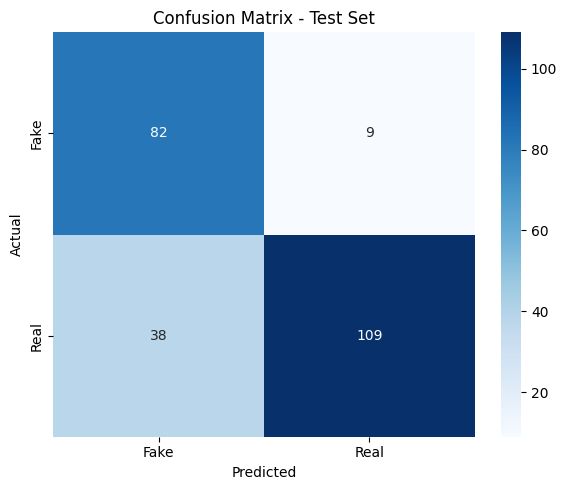

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Extract predictions and targets
y_true = results['test_results']['targets']
y_pred = results['test_results']['predictions']

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Fake', 'Real']

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix_seaborn.png')
plt.show()


In [38]:
# import matplotlib.pyplot as plt

# history = results['training_history']

# epochs = range(1, len(history['train_losses']) + 1)

# plt.figure(figsize=(14, 6))

# # Plot Loss
# plt.subplot(1, 2, 1)
# plt.plot(epochs, history['train_losses'], label='Train Loss', marker='o')
# plt.plot(epochs, history['val_losses'], label='Val Loss', marker='x')
# plt.title('Loss over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

# # Plot Accuracy
# plt.subplot(1, 2, 2)
# plt.plot(epochs, history['train_accuracies'], label='Train Accuracy', marker='o')
# plt.plot(epochs, history['val_accuracies'], label='Val Accuracy', marker='x')
# plt.title('Accuracy over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.savefig("training_curves.png")
# plt.show()


In [42]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import DebertaV2Tokenizer, DebertaV2Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    roc_auc_score,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

class DebertaReviewDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=256):
        texts = (df['reviewText'].fillna('') + ' [SEP] ' + df['summary'].fillna('')).tolist()
        enc = tokenizer(texts, padding=True, truncation=True,
                        max_length=max_length, return_tensors='pt')
        self.input_ids = enc['input_ids']
        self.attention_mask = enc['attention_mask']
        self.targets = torch.tensor(df['verified'].astype(int).values, dtype=torch.float)
        num_cols = [
            'overall','unixReviewTime','product_rolling_mean_rating',
            'product_rolling_std_rating','category_rolling_mean_rating',
            'category_rolling_std_rating','polarity','subjectivity',
            'mean','std_dev','skewness','kurtosis'
        ]
        self.numerical = torch.tensor(df[num_cols].fillna(0).values, dtype=torch.float)

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'numerical': self.numerical[idx],
            'target': self.targets[idx]
        }


class DebertaFakeReviewDetector(nn.Module):
    def __init__(self, num_features, dropout=0.3):
        super().__init__()
        self.deberta = DebertaV2Model.from_pretrained('microsoft/deberta-v3-base')
        hidden = self.deberta.config.hidden_size
        self.fc = nn.Sequential(
            nn.Linear(hidden + num_features, 256),
            nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(256, 64),
            nn.BatchNorm1d(64), nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(64, 1)
        )

    def forward(self, input_ids, attention_mask, numerical):
        out = self.deberta(input_ids=input_ids, attention_mask=attention_mask)
        cls = out.last_hidden_state[:, 0]
        x = torch.cat([cls, numerical], dim=1)
        return self.fc(x).squeeze()

def train_epoch(model, loader, criterion, optimizer, device):
    model.train(); total_loss, preds, targets = 0, [], []
    for b in loader:
        optimizer.zero_grad()
        ids, mask, num, y = (b['input_ids'], b['attention_mask'],
                             b['numerical'], b['target'])
        ids, mask, num, y = [t.to(device) for t in (ids, mask, num, y)]
        logits = model(ids, mask, num)
        loss = criterion(logits, y)
        loss.backward(); nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        total_loss += loss.item()
        probs = torch.sigmoid(logits).detach().cpu().numpy()
        preds += list((probs > 0.5).astype(int))
        targets += list(y.cpu().numpy())

    return total_loss/len(loader), accuracy_score(targets, preds)

def eval_model(model, loader, criterion, device):
    model.eval(); total_loss, preds, targets, probas = 0, [], [], []
    with torch.no_grad():
        for b in loader:
            ids, mask, num, y = (b['input_ids'], b['attention_mask'],
                                 b['numerical'], b['target'])
            ids, mask, num, y = [t.to(device) for t in (ids, mask, num, y)]
            logits = model(ids, mask, num)
            total_loss += criterion(logits, y).item()
            probs = torch.sigmoid(logits).cpu().numpy()
            probas += list(probs)
            preds += list((probs > 0.5).astype(int))
            targets += list(y.cpu().numpy())

    prec, rec, f1, _ = precision_recall_fscore_support(targets, preds, average='binary')
    auc = roc_auc_score(targets, probas)
    return total_loss/len(loader), accuracy_score(targets, preds), prec, rec, f1, auc


def run_training(df, batch_size=32, epochs=5, lr=3e-5, max_len=128):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    tok = DebertaV2Tokenizer.from_pretrained('microsoft/deberta-v3-base')

    tr, te = train_test_split(df, test_size=0.2, stratify=df['verified'], random_state=42)
    tr, va = train_test_split(tr, test_size=0.1, stratify=tr['verified'], random_state=42)

    loaders = {}
    for name, d in zip(['train','val','test'], [tr, va, te]):
        ds = DebertaReviewDataset(d, tok, max_length=max_len)
        shuffle = (name=='train')
        loaders[name] = DataLoader(ds, batch_size=batch_size, shuffle=shuffle)

    num_f = next(iter(loaders['train']))['numerical'].shape[1]
    model = DebertaFakeReviewDetector(num_f).to(device)
    opt = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-2)
    crit = nn.BCEWithLogitsLoss()

    best_auc = 0
    for e in range(1, epochs+1):
        tl, ta = train_epoch(model, loaders['train'], crit, opt, device)
        vl, va, vp, vr, vf1, vauc = eval_model(model, loaders['val'], crit, device)
        if vauc > best_auc:
            best_auc, _ = vauc, torch.save(model.state_dict(), 'best_deberta.pth')
        print(f"Epoch {e}: Train L={tl:.4f} A={ta:.4f} | Val L={vl:.4f} A={va:.4f} F1={vf1:.4f} AUC={vauc:.4f}")

    # Final Test & Confusion Matrix
    _, ta, p, r, f1, auc = eval_model(model, loaders['test'], crit, device)
    print(f"Test: Acc={ta:.4f} Prec={p:.4f} Rec={r:.4f} F1={f1:.4f} AUC={auc:.4f}")

    # Confusion matrix plot
    y_true = loaders['test'].dataset.targets.numpy()
    y_pred = (torch.sigmoid(model(
        loaders['test'].dataset.input_ids.to(device),
        loaders['test'].dataset.attention_mask.to(device),
        loaders['test'].dataset.numerical.to(device)
    )).detach().cpu().numpy() > 0.5).astype(int)

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted'); plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [48]:
if __name__ == "__main__":
    import pandas as pd

    # Load your enriched DataFrame
    df = enriched_df

    run_training(
        df,
        batch_size=4,
        epochs=5,
        lr=0.001,
        max_len=128
    )

Epoch 1: Train L=0.6570 A=0.6019 | Val L=1.0360 A=0.6105 F1=0.7582 AUC=0.6309
Epoch 2: Train L=0.6656 A=0.5984 | Val L=0.8515 A=0.6105 F1=0.7582 AUC=0.6319
Epoch 3: Train L=0.6733 A=0.6019 | Val L=0.7160 A=0.6105 F1=0.7582 AUC=0.6062
Epoch 4: Train L=0.6519 A=0.6066 | Val L=0.6713 A=0.6105 F1=0.7582 AUC=0.6184
Epoch 5: Train L=0.6601 A=0.6148 | Val L=0.6582 A=0.6105 F1=0.7582 AUC=0.6668
Test: Acc=0.6176 Prec=0.6176 Rec=1.0000 F1=0.7636 AUC=0.7113


OutOfMemoryError: CUDA out of memory. Tried to allocate 180.00 MiB. GPU 0 has a total capacity of 44.53 GiB of which 43.25 MiB is free. Process 569574 has 44.48 GiB memory in use. Of the allocated memory 43.63 GiB is allocated by PyTorch, and 353.35 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)